In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pylab as plt
import tensorflow as tf
import numpy as np
import cv2
import os

In [2]:
img=image.load_img(r"C:\Users\MRUTYUNJAY\Desktop\CNN\New folder\download.png")

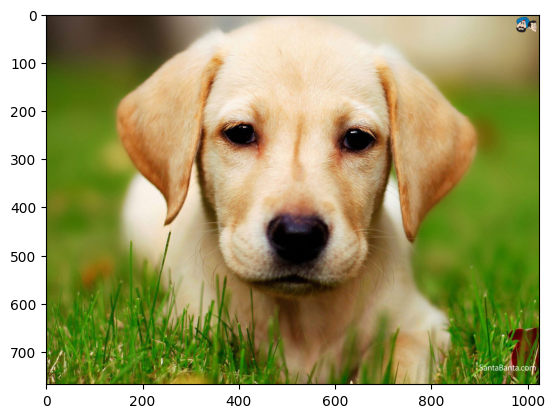

In [3]:
plt.imshow(img)

In [4]:
i1=cv2.imread(r"C:\Users\MRUTYUNJAY\Desktop\CNN\New folder\download.png")
i1

array([[[ 35,  44,  54],
        [ 35,  44,  54],
        [ 36,  45,  55],
        ...,
        [ 86, 131, 152],
        [ 85, 130, 151],
        [ 84, 129, 150]],

       [[ 35,  44,  54],
        [ 35,  44,  54],
        [ 36,  45,  55],
        ...,
        [ 86, 131, 152],
        [ 85, 130, 151],
        [ 84, 129, 150]],

       [[ 35,  44,  54],
        [ 35,  44,  54],
        [ 36,  45,  55],
        ...,
        [ 86, 131, 152],
        [ 85, 130, 151],
        [ 84, 129, 150]],

       ...,

       [[  0,  66,  55],
        [ 17,  88,  85],
        [ 46, 122, 121],
        ...,
        [  5,  43,  31],
        [  0,  38,  21],
        [  0,  47,  25]],

       [[  3,  74,  71],
        [ 16,  87,  90],
        [ 33, 107, 113],
        ...,
        [  7,  51,  34],
        [  2,  48,  25],
        [  0,  40,  12]],

       [[ 14,  85,  89],
        [ 13,  83,  96],
        [ 13,  84,  98],
        ...,
        [ 18,  65,  43],
        [  0,  42,  15],
        [  0,  44,  12]]

In [5]:
i1.shape

(768, 1024, 3)

In [6]:
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)

In [7]:
train_dataset=train.flow_from_directory(r"C:\Users\MRUTYUNJAY\Desktop\CNN\training",
                                        target_size=(200,200),
                                        batch_size=3,
                                        class_mode='binary')
validation_dataset=validation.flow_from_directory(r"C:\Users\MRUTYUNJAY\Desktop\CNN\validation",
                                                  target_size=(200,200),
                                                  batch_size=3,
                                                  class_mode='binary')   

Found 21 images belonging to 2 classes.
Found 4 images belonging to 2 classes.


In [8]:
train_dataset.class_indices

{'Happy': 0, 'Not happy': 1}

In [9]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [10]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(200,200,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 64)       0

In [11]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
              metrics=['acc'])

In [12]:
model_fit=model.fit(train_dataset,
                   steps_per_epoch=3,
                   epochs=10,
                   validation_data=validation_dataset)

Epoch 1/10
3/3 [==============================] - 3s 617ms/step - loss: 26.8834 - acc: 0.5556 - val_loss: 0.6729 - val_acc: 0.5000
Epoch 2/10
3/3 [==============================] - 2s 566ms/step - loss: 0.9433 - acc: 0.4444 - val_loss: 0.9272 - val_acc: 0.5000
Epoch 3/10
3/3 [==============================] - 2s 612ms/step - loss: 0.6959 - acc: 0.7778 - val_loss: 0.5117 - val_acc: 0.7500
Epoch 4/10
3/3 [==============================] - 2s 551ms/step - loss: 0.8734 - acc: 0.4444 - val_loss: 0.5000 - val_acc: 0.7500
Epoch 5/10
3/3 [==============================] - 1s 438ms/step - loss: 0.5627 - acc: 0.6667 - val_loss: 0.3991 - val_acc: 1.0000
Epoch 6/10
3/3 [==============================] - 2s 439ms/step - loss: 0.7577 - acc: 0.5556 - val_loss: 0.6620 - val_acc: 0.7500
Epoch 7/10
3/3 [==============================] - 1s 449ms/step - loss: 0.3036 - acc: 0.7778 - val_loss: 0.9281 - val_acc: 0.5000
Epoch 8/10
3/3 [==============================] - 2s 600ms/step - loss: 1.0887 - acc: 0.6

In [ ]:
history.history??

Epoch 1/10
3/3 [==============================] - 2s 597ms/step - loss: 0.8823 - acc: 0.5556 - val_loss: 0.4809 - val_acc: 0.7500
Epoch 2/10
3/3 [==============================] - 1s 544ms/step - loss: 0.3852 - acc: 1.0000 - val_loss: 0.5307 - val_acc: 0.5000
Epoch 3/10
3/3 [==============================] - 1s 449ms/step - loss: 0.4778 - acc: 0.7778 - val_loss: 0.4104 - val_acc: 0.7500
Epoch 4/10
3/3 [==============================] - 1s 478ms/step - loss: 0.2238 - acc: 1.0000 - val_loss: 0.2768 - val_acc: 1.0000
Epoch 5/10
3/3 [==============================] - 1s 459ms/step - loss: 0.0734 - acc: 1.0000 - val_loss: 0.2885 - val_acc: 1.0000
Epoch 6/10
3/3 [==============================] - 2s 439ms/step - loss: 0.0984 - acc: 1.0000 - val_loss: 0.1972 - val_acc: 1.0000
Epoch 7/10
3/3 [==============================] - 1s 455ms/step - loss: 0.1210 - acc: 1.0000 - val_loss: 0.1905 - val_acc: 1.0000
Epoch 8/10
3/3 [==============================] - 1s 426ms/step - loss: 0.0710 - acc: 1.00

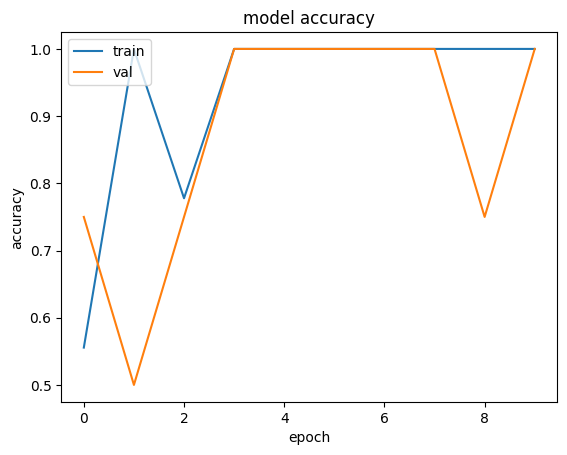

In [13]:
import keras
import matplotlib.pyplot as plt
history=model_fit=model.fit(train_dataset,steps_per_epoch=3,epochs=10,validation_data=validation_dataset)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'],loc='upper left')
plt.show()

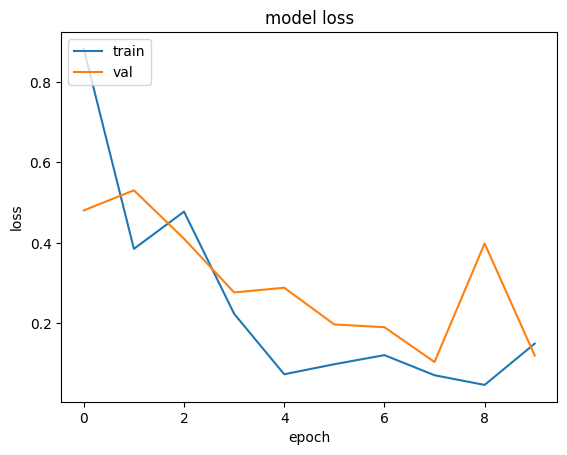

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'],loc='upper left')
plt.show()